In [2]:
import numpy
import imageio
import gari
import pygad
import matplotlib.pyplot

target_im = imageio.imread('fruit.jpg')
target_im = numpy.asarray(target_im/255, dtype=float)

In [3]:
target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(ga_instance, solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome - solution))
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness


In [4]:
ga_instance = pygad.GA(
    num_generations=20000,              # Decreased the number of generations to speed up the algorithm.
    num_parents_mating=5,              # Reduced the number of parents mating for faster execution.
    fitness_func=fitness_fun,
    sol_per_pop=10,                   # Smaller population size for faster computation.
    num_genes=target_im.size,
    init_range_low=0.0,
    init_range_high=1.0,
    mutation_percent_genes=0.05,      # Slightly increased mutation rate for diversity.
    mutation_type="random",
    mutation_by_replacement=True,
    random_mutation_min_val=0.0,
    random_mutation_max_val=1.0
)


In [22]:
ga_instance.run() 

Fitness value of the best solution = 32288.761676344846
Index of the best solution : 6
Best fitness value reached after 1000 generations.


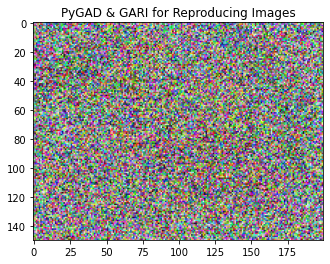

In [20]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = gari.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()